# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

Given: $(x_i, y_i)$
To find: $a$ and $b$, coefficients of the line of best fit $\hat{y_i} = a + b x_i$
For this, we minimise the sum of squared errors.

$f(Y, \hat{Y}) = \sum_{i=0}^{n} (y_i - \hat{y_i})^2$

$ = \sum_{i=0}^{n}(y_i - a - bx_i)^2$

$\frac{\partial F}{\partial a} = \sum_{i = 1}^{n}(y_i - a - bx_i)^2$

$= \sum_{i=1}^{n}-2(y_i - a - bx_i) = 0$

$\Rightarrow y_i - a - bx_i = 0$

$\Rightarrow n\bar{y} - na - n\bar{x} = 0$

$\Rightarrow a = \bar{y} - b\bar{x}$


## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

No, the loss function is a positive parabola- this means that there is a unique global minimum- that being the vertex of the parabola.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?


No, they would not be different. The reason for this is quite trivial: minimising f(x) is the same as minimising a * f(x), where a is a positive number. (In this case, a = 1/n

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---

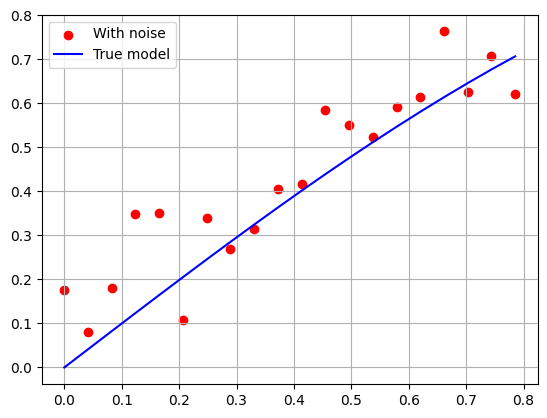

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(0)

def generate_sin(x, epsilon):
    func = []
    for numb in x:
        func.append(math.sin(numb) + np.random.normal(0, epsilon))
    return func

n_samples = np.linspace(0, (math.pi)/4, 20)

# TODO: create noisy function
x = n_samples
y = generate_sin(x, 0.1)

# TODO: create true function
x_pure = n_samples
y_pure = generate_sin(x, 0)

# TODO: plot data, line
plt.scatter(x,y, label = "With noise", color = "red")
plt.plot(x_pure, y_pure, label = "True model", color = "blue")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

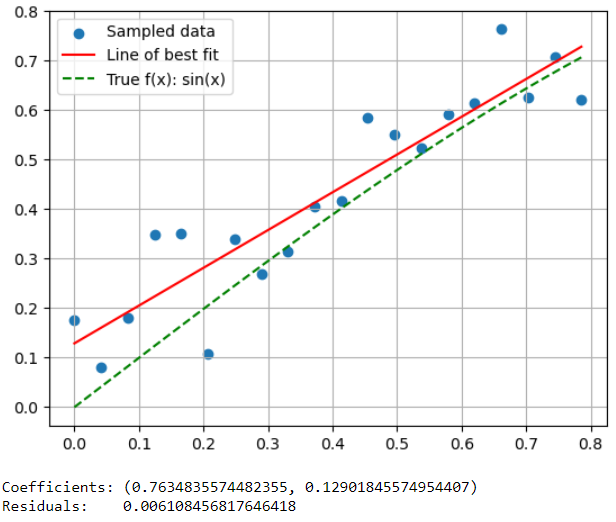

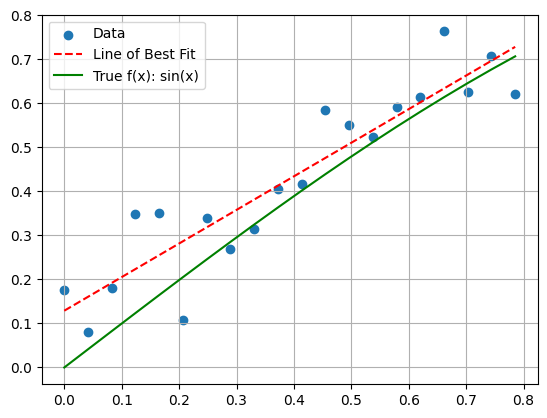

Coefficients: (0.12901845574954401, 0.7634835574482356)
Residuals: 0.12216913635292843


In [103]:
def compute_sos(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum((y_true - y_pred) ** 2)

def lin_reg(xs, ys):
    xbar = sum(xs) / len(xs)
    ybar = sum(ys) / len(ys)
    num_list = []
    den_list = []
    for x, y in zip(xs, ys):
        num_list.append((x - xbar) * (y - ybar))
        den_list.append((x - xbar) ** 2)
    b = sum(num_list) / sum(den_list)
    a = ybar - b * xbar
    y_pred = [a + b * x for x in xs]
    res = compute_sos(ys, y_pred)
    return a, b, res

# Compute line of best fit
a, b, res = lin_reg(x, y)
y_best = [b * xi + a for xi in x]

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, y_best, color='red', label='Line of Best Fit', linestyle='--')
plt.plot(x, y_pure, color='green', label='True f(x): sin(x)')

# Beautify the plot
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:", res)


## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

Coefficients:      (0.12901845574954401, 0.7634835574482356)
Residuals:         0.12216913635292843
Coefficients (np): (0.1290184557495442, 0.7634835574482354)
Residuals (np):    0.09053510762973603


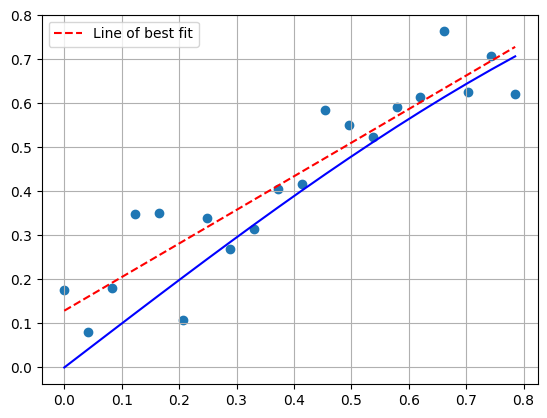

In [104]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = a_np + b_np * x

# TODO: plot everything you need to
plt.scatter(x, y)
plt.plot(x, y_best_np, color = "red", linestyle='--', label = "Line of best fit")
plt.plot(x, y_pure, color = "blue")
plt.grid()
plt.legend()

#Defining res
res_np = compute_sos(y_pure, y_best_np)


# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

From the results, it can be inferred that the polyfit function is implemented by minimising the square errors. Implementing it for degree 1 gives us the same output as the OLS estimators for α and β that we found manually.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

Coefficients:  (0.12901845574954401, 0.7634835574482356)
Train loss:    0.006108456817646422
Test loss:     0.032086640867367046


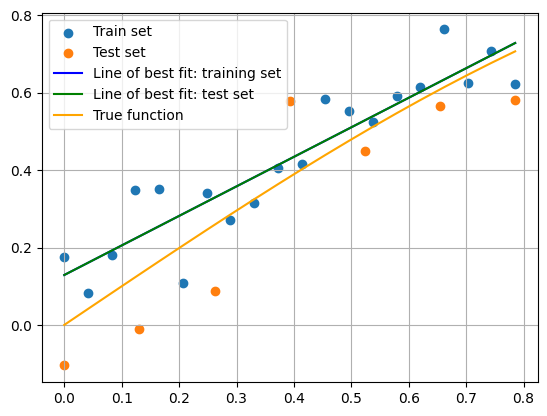

In [105]:
import random

def compute_mse(y_true, y_pred):
    mse = compute_sos(y_true, y_pred)/len(y_pred)
    return mse


#I'm not entirely sure by what was meant by generating a new set of x-values. I decided to still use the linspace function but a different (and co-prime with 20) number of observations.
#In later exercises, I generated only one list and then split it randomly into a test and training set
x_test = np.linspace(0, (math.pi)/4, 7)
y_test_true = generate_sin(x_test, 0.1)
y_test_pred = a + b * x_test
y_test_pure = generate_sin(x_test, epsilon = 0)

plt.scatter(x, y, label="Train set")
plt.scatter(x_test, y_test_true, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty
plt.plot(x, y_best, label = "Line of best fit: training set", color = "blue")
plt.plot(x_test, y_test_pred, label = "Line of best fit: test set", color = "green")
plt.plot(x, y_pure, label = "True function", color = "orange")
plt.grid()
plt.legend()


test_loss = compute_mse(y_test_true, y_test_pred)
train_loss = compute_mse(y, y_best)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

Firstly, since we know that the data we generated is of the same distribution (by definition), and also it seems to be a similar distribution from the plots. Now, out of the two losses, the loss for the training set should be lower. This is intuitive, because our estimates of α and β are such that the loss of the training set is minimised. Since we are using these same estimates on a different data set (test set), we would expect the losses to be higher. This is also exactly what we observe here.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

In [107]:
epsilon = 0
sample_n = {20,50,100,200}


for numb in range(9):
  epsilon += 0.1
  x1 = np.linspace(0, (math.pi)/4, 20)
  y1_true = generate_sin(x, epsilon)
  a1, b1, res1 = lin_reg(x1, y1_true)
  y1_pred = a1 + b1 * x1
  print("MSE with epsilon value of" , epsilon , "=", compute_mse(y1_true, y1_pred))


for n in sample_n:
  x1 = np.linspace(0, (math.pi)/4, n)
  y1_true = generate_sin(x1, epsilon)
  a1, b1, res1 = lin_reg(x1, y1_true)
  y1_pred = a1 + b1 * x1
  print("MSE with n =", n, compute_mse(y1_true, y1_pred))



MSE with epsilon value of 0.1 = 0.010800813389891667
MSE with epsilon value of 0.2 = 0.04851340332423111
MSE with epsilon value of 0.30000000000000004 = 0.060098920706099256
MSE with epsilon value of 0.4 = 0.10963268594423066
MSE with epsilon value of 0.5 = 0.26748405202896974
MSE with epsilon value of 0.6 = 0.16415989234208486
MSE with epsilon value of 0.7 = 0.5199479791261276
MSE with epsilon value of 0.7999999999999999 = 0.4633277739635795
MSE with epsilon value of 0.8999999999999999 = 0.8577172935480034
MSE with n = 200 0.8042474523398659
MSE with n = 50 0.7393540131867204
MSE with n = 100 0.8992674703806831
MSE with n = 20 0.4696884298000926


A higher variance of the error term (more noise) intuitively means that the dispersion of the error terms around the line of best fit is larger. As a result, one would expect larger residuals.

Different values of $n$ gives us more sample points to work with. Having having more training data should increase the performance of our model, which it does seem to do.


## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

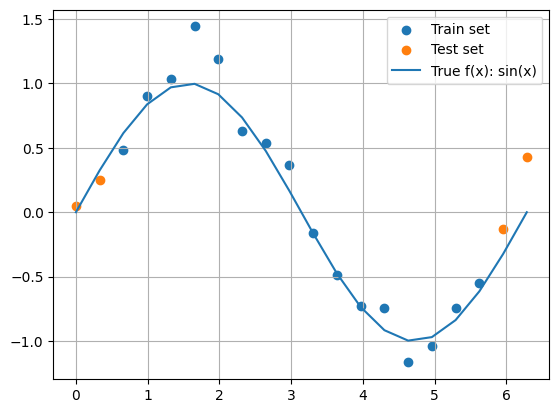

In [115]:
import random
# TODO: generate new data and plot
n_samples = np.linspace(0, 2 * np.pi, 20)
x = n_samples

#Okay, I tried a few different things here. I tried shuffling the n_samples list to randomise the selection of the train and test set
test_proportion = 0.2

num_test = int(len(n_samples) * test_proportion)
# Shuffle the observations
random.shuffle(x)

# Split the shuffled list into training and test sets
x_train = x[num_test:]
x_test = x[:num_test]

#Sorting x_train and x_test, since right now the ordering is random
x_train = np.sort(x_train, 0)
x_test = np.sort(x_test, 0)

y_train = generate_sin(x_train, 0.2)
y_test = generate_sin(x_test, 0.2)

#Now, for pure function:
x_pure = np.linspace(0, 2 * np.pi, 20)
y_pure = np.sin(x_pure)

plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [116]:


#Note: I changed the mse function before, instead of redefining it, since a and b were never necessary for the actual function


n_samples = 20

#Initialising lists to store results
y_train_pred = []
y_test_pred = []
mse_train = []
mse_test = []


for deg in range (1,21):
  coefficients = np.polyfit(x_train, y_train, deg)
  y_train_pred = np.polyval(coefficients, x_train)
  mse_train.append(compute_mse(y_train, y_train_pred))
  y_test_pred = np.polyval(coefficients, x_test)
  mse_test.append(compute_mse(y_test, y_test_pred))

print(mse_train)
print(mse_test)


[0.16132266011103372, 0.16073108925422452, 0.015173865028838374, 0.014062993612181277, 0.014062774043646028, 0.013964137752900611, 0.011835536407840724, 0.011824810343987312, 0.011686100159700674, 0.007413375744587974, 0.0016101359882945696, 0.0009779114473620649, 0.0009703535850648503, 0.00016506343156537834, 1.1111946696231788e-09, 7.329144507032083e-12, 2.7073868346499916e-12, 8.978135375188654e-13, 2.3461907591320992e-14, 6.2581481695210436e-15]
[2.0940719922530153, 2.115775487025071, 0.43272672565847753, 0.6554252548452747, 0.6660700352492359, 0.4318026555914075, 7.9185727484360555, 8.378756892643139, 56.46902440300698, 4657.384644470987, 50936.198617460745, 74317.47359137223, 42360.746433564695, 21847178.570071936, 201547267.77831402, 257591552.9219901, 371329120.2019121, 540832753.0848895, 775284830.8245248, 1084074293.4142983]


<ipython-input-116-3c407a7cb32a>:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)
<ipython-input-116-3c407a7cb32a>:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)
<ipython-input-116-3c407a7cb32a>:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)
<ipython-input-116-3c407a7cb32a>:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)
<ipython-input-116-3c407a7cb32a>:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

From my understanding, this means that the best fit is not well-defined due to numerical error. Intuitively, this could mean that (especially for higher degree model specifications), that small changes in the input would lead to large changes in the output- ie, there is great risk of overfitting in our model.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

<ipython-input-117-1440d72453be>:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, deg)


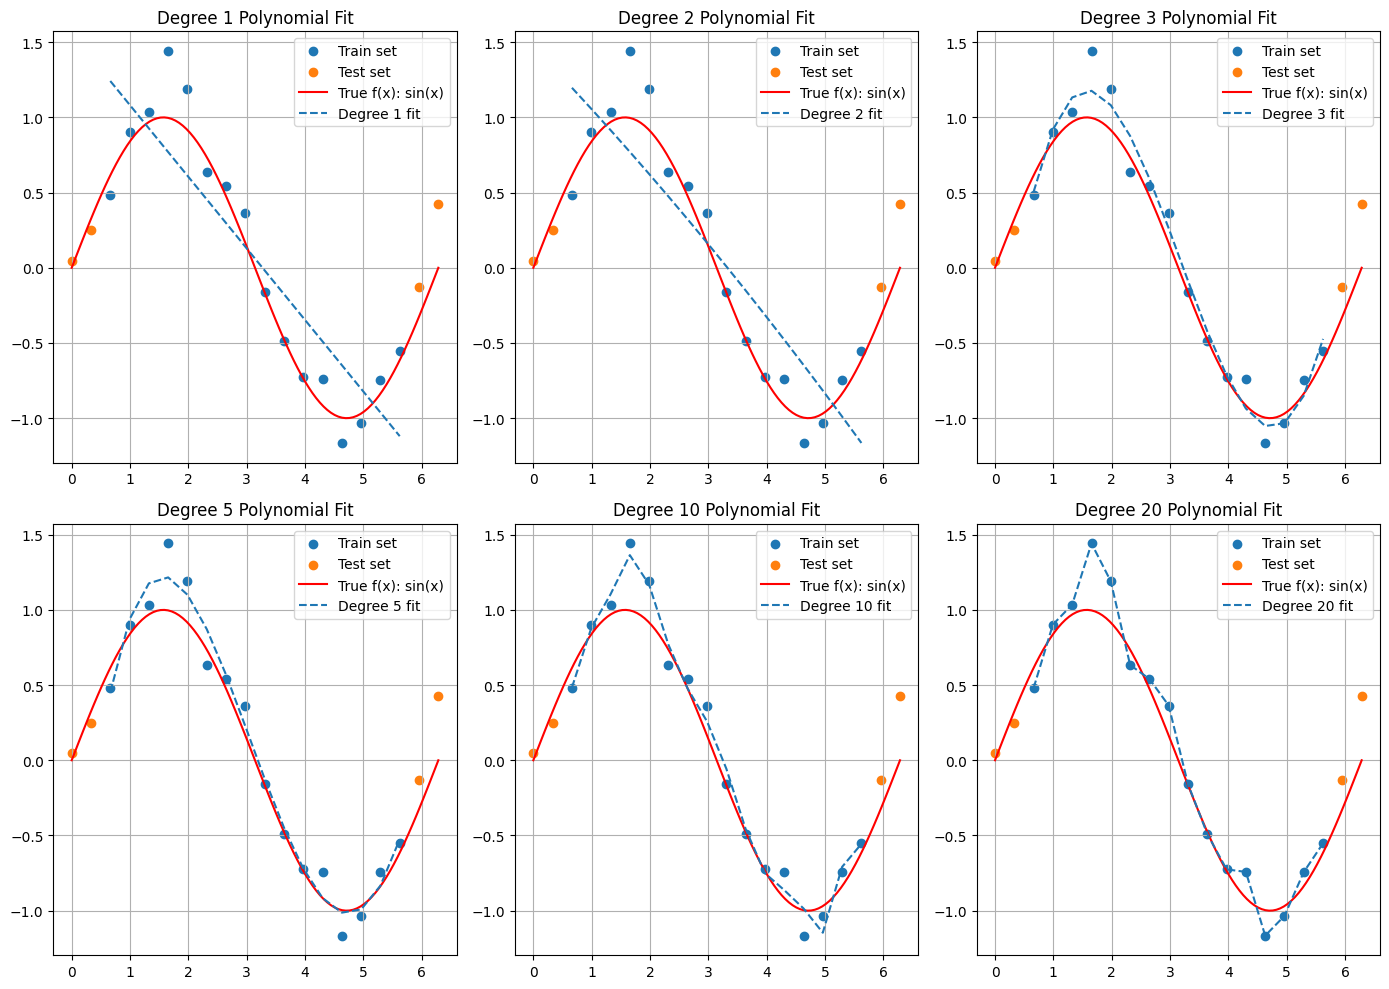

In [117]:
d = [1, 2, 3, 5, 10, 20]  # Use list instead of set for maintaining order

plt.figure(figsize=(14, 10))

for i, deg in enumerate(d):  # Iterate

    # Fit polynomial
    coefficients = np.polyfit(x_train, y_train, deg)

    plt.subplot(2, 3, i + 1)

    plt.scatter(x_train, y_train, label="Train set")
    plt.scatter(x_test, y_test, label="Test set")

    x_pure = np.linspace(0, 2 * np.pi, 100)
    y_pure = np.sin(x_pure)
    plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color="red")

    # Plot line of best fit
    y_train_pred = np.polyval(coefficients, x_train)
    plt.plot(x_train, y_train_pred, label=f"Degree {deg} fit", linestyle="--")

    plt.title(f"Degree {deg} Polynomial Fit")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

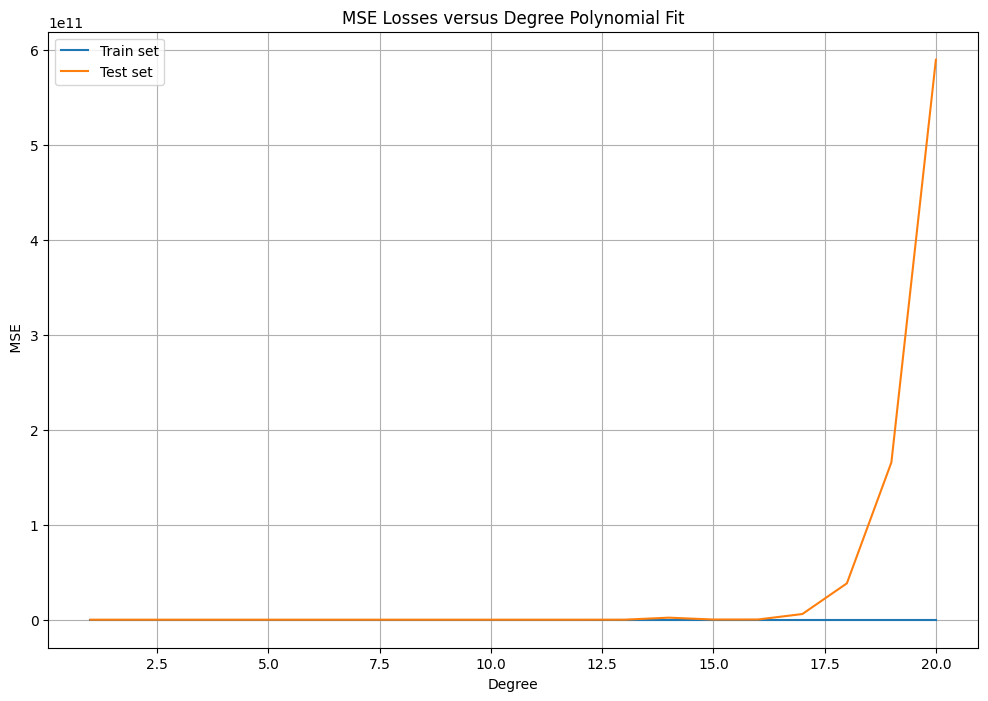

In [111]:
# Plot MSE losses vs degree
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), mse_train, label='Train set')
plt.plot(range(1, 21), mse_test, label='Test set')
plt.xlabel('Degree')
plt.ylabel(' MSE')
plt.title('MSE Losses versus Degree Polynomial Fit')
plt.legend()
plt.grid()
plt.show()

#I know this graph is not correct, but could not figure out what was causing the problem.

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. The polynomial models start to overfit (here I will extrapolate from the graphs shown in class) where the mean squared errors of the train and test sets tend to diverge a lot. Intuitively, this is because when the models overfit, they tend to start fitting to noise. When they begin fitting to noise, the models will fit the training model nearly perfectly and diverge entirely from the test set (since it is sensitive to the noise observed in the training set).

2. I'm afraid I cannot answer this question since the MSE graph is not giving me accurate or dependable results.

3. Same as (2). Apologies!

4. In general, increasing the number of training points should allow for more flexible models in the real world. If the assumption of noise being iid holds, then more training points should allow for more flexible models. However, there are many limitations. For example, if the error terms are correlated- the model would not be as accurate.